In [32]:
import os
import openai

import numpy as np
from urllib.request import urlopen

from openai.embeddings_utils import get_embedding
from sentence_transformers import util


In [26]:
openai.api_key = os.environ['OPENAI_API_KEY']

In [27]:
# define the engine we will use for embeddings
ENGINE = 'text-embedding-ada-002'

# list embedding engines
[e for e in openai.Engine.list().data if 'embed' in e.id or 'search' in e.id]

[<Engine engine id=text-embedding-ada-002 at 0x106cb8400> JSON: {
   "created": null,
   "id": "text-embedding-ada-002",
   "object": "engine",
   "owner": "openai-internal",
   "permissions": null,
   "ready": true
 },
 <Engine engine id=babbage-code-search-code at 0x106dacfe0> JSON: {
   "created": null,
   "id": "babbage-code-search-code",
   "object": "engine",
   "owner": "openai-dev",
   "permissions": null,
   "ready": true
 },
 <Engine engine id=babbage-code-search-text at 0x15fa2cef0> JSON: {
   "created": null,
   "id": "babbage-code-search-text",
   "object": "engine",
   "owner": "openai-dev",
   "permissions": null,
   "ready": true
 },
 <Engine engine id=curie-search-query at 0x15fa2d030> JSON: {
   "created": null,
   "id": "curie-search-query",
   "object": "engine",
   "owner": "openai-dev",
   "permissions": null,
   "ready": true
 },
 <Engine engine id=code-search-babbage-text-001 at 0x15fa2d0d0> JSON: {
   "created": null,
   "id": "code-search-babbage-text-001",
  

In [44]:
# Our good old textbook about insects
text = urlopen('https://www.gutenberg.org/cache/epub/10834/pg10834.txt').read().decode()

# Only keep documents of at least 100 characters, same as before
documents = list(filter(lambda x: len(x) > 100, text.split('\r\n\r\n')))

print(f'There are {len(documents)} documents/paragraphs')

There are 79 documents/paragraphs


In [29]:
# Embed each document using GPT3-like embeddings

embeddings = [get_embedding(document, engine=ENGINE) for document in documents]

# Turn into a numpy matrix
embeddings = np.array(embeddings)

In [41]:
QUESTION = 'How many horns does a flea have?'  # a natural language query

In [ ]:
# Encode the query using OpenAI and find relevant documents
question_embedding = np.array(get_embedding(QUESTION, engine=ENGINE))


In [47]:
# Sentence Transformers semantic search is ready to go. We could rewrite it otherwise
hits = util.semantic_search(question_embedding, embeddings, top_k=1)[0]

hits

[{'corpus_id': 14, 'score': 0.8606411078952201}]

In [50]:
print(f'Question: {QUESTION}\n')

for i, hit in enumerate(hits):
    
    print(f'Document {i + 1} Cos_Sim {hit["score"]:.3f}:\n\n{documents[hit["corpus_id"]]}')
    print('\n')

Question: How many horns does a flea have?

Document 1 Cos_Sim 0.861:

When examined by a microscope, the flea is a pleasant object. The body
is curiously adorned with a suit of polished armour, neatly jointed, and
beset with a great number of sharp pins almost like the quills of a
porcupine: it has a small head, large eyes, two horns, or feelers, which
proceed from the head, and four long legs from the breast; they are very
hairy and long, and have several joints, which fold as it were one
within another.




In [52]:
context = documents[hit["corpus_id"]]

In [53]:
PROMPT = f"Given this context, answer the question.\n\nContext: {context}\nQuery: {QUESTION}\nAnswer:"


In [54]:
def test_prompt(prompt, suppress=False, **kwargs):

    response = openai.Completion.create(
      model='text-davinci-003',
      prompt=prompt,
      max_tokens=256,
      **kwargs
    )
    if not suppress:
        print(f'PROMPT:\n------\n{prompt}\n------\nRESPONSE\n------\n{prompt}{response.choices[0].text}')


In [55]:
test_prompt(PROMPT)

PROMPT:
------
Given this context, answer the question.

Context: When examined by a microscope, the flea is a pleasant object. The body
is curiously adorned with a suit of polished armour, neatly jointed, and
beset with a great number of sharp pins almost like the quills of a
porcupine: it has a small head, large eyes, two horns, or feelers, which
proceed from the head, and four long legs from the breast; they are very
hairy and long, and have several joints, which fold as it were one
within another.
Query: How many horns does a flea have?
Answer:
------
RESPONSE
------
Given this context, answer the question.

Context: When examined by a microscope, the flea is a pleasant object. The body
is curiously adorned with a suit of polished armour, neatly jointed, and
beset with a great number of sharp pins almost like the quills of a
porcupine: it has a small head, large eyes, two horns, or feelers, which
proceed from the head, and four long legs from the breast; they are very
hairy and lon

In [59]:
# let's have some more fun
test_prompt(f"Given this context, answer the question for a second grader. Be fun!\n\nContext: {context}\nQuery: {QUESTION}\nAnswer:")


PROMPT:
------
Given this context, answer the question for a second grader. Be fun!

Context: When examined by a microscope, the flea is a pleasant object. The body
is curiously adorned with a suit of polished armour, neatly jointed, and
beset with a great number of sharp pins almost like the quills of a
porcupine: it has a small head, large eyes, two horns, or feelers, which
proceed from the head, and four long legs from the breast; they are very
hairy and long, and have several joints, which fold as it were one
within another.
Query: How many horns does a flea have?
Answer:
------
RESPONSE
------
Given this context, answer the question for a second grader. Be fun!

Context: When examined by a microscope, the flea is a pleasant object. The body
is curiously adorned with a suit of polished armour, neatly jointed, and
beset with a great number of sharp pins almost like the quills of a
porcupine: it has a small head, large eyes, two horns, or feelers, which
proceed from the head, and fou

# Use DALL-E to generate an Image

In [104]:
response = openai.Image.create(
  prompt="A flea has two horns, or feelers, that come out from its head. It's almost like a tiny porcupine!",
  n=1,
  size="256x256"
)
image_url = response['data'][0]['url']

In [105]:
from PIL import Image
import urllib


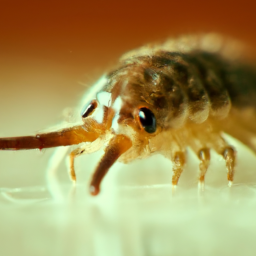

In [108]:
urllib.request.urlretrieve(
  image_url,
   "../data/dalle.png")
  
img = Image.open("../data/dalle.png")
display(img)